<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest
6. XGBoost

We will evaluate our models using:

1.  Accuracy Score
2.  Precision
3.  Recall
4.  f1_score

# About The Dataset


Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



### Heart Disease Dataset

| Field           | Description                                                                 | Unit/Values                                     | Type     |
|-----------------|-----------------------------------------------------------------------------|-------------------------------------------------|----------|
| Age             | Age of the patient                                                          | years                                           | integer  |
| Sex             | Sex of the patient                                                          | [M: Male, F: Female]                            | object   |
| ChestPainType   | Chest pain type                                                             | [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] | object   |
| RestingBP       | Resting blood pressure                                                      | mm Hg                                           | integer  |
| Cholesterol     | Serum cholesterol                                                           | mm/dl                                           | integer  |
| FastingBS       | Fasting blood sugar                                                         | [1: if FastingBS > 120 mg/dl, 0: otherwise]    | integer  |
| RestingECG      | Resting electrocardiogram results                                           | [Normal: Normal, ST: having ST-T wave abnormality, LVH: left ventricular hypertrophy] | object   |
| MaxHR           | Maximum heart rate achieved                                                 | Numeric value between 60 and 202                | integer  |
| ExerciseAngina  | Exercise-induced angina                                                     | [Y: Yes, N: No]                                 | object   |
| Oldpeak         | ST depression                                                               | Numeric value                                   | float    |
| ST_Slope        | The slope of the peak exercise ST segment                                   | [Up: upsloping, Flat: flat, Down: downsloping]  | object   |
| HeartDisease    | Output class                                                                | [1: heart disease, 0: Normal]                   | integer  |

You can copy and paste these Markdown tables directly into your Jupyter Notebook cells. To render them properly, make sure the cell is set to Markdown format.

Column definitions were gathered from [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download]



# I. Explortatory Data Analysis (EDA) and Feature Engineering


## 1.1 Import Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.metrics import log_loss, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Importing the Dataset


In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 1.3 Data Preprocessing


### One Hot Encoding


First, we need to check the datatype of each column.


In [3]:
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope are categorical columns, we need to transform them. We can easily use pd.get_dummies to do that.

In [5]:
heart_processed = pd.get_dummies(heart, dtype=int, drop_first=True)

In [6]:
heart_processed.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [7]:
heart_processed.duplicated().value_counts()

False    918
Name: count, dtype: int64

Next, let's check the target variable in the `class` column to see the label values and their distribution.

<Axes: xlabel='ST_Slope_Up'>

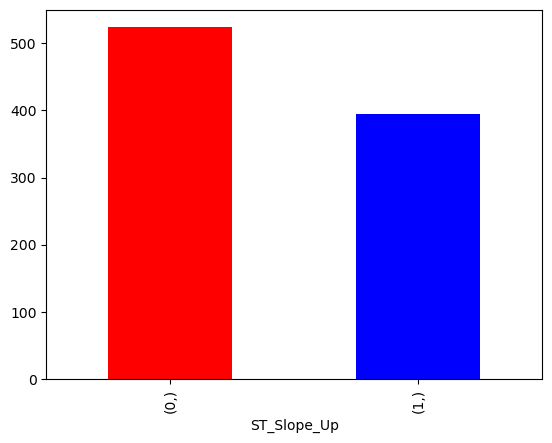

In [8]:
heart_processed.iloc[:, -1:].value_counts().plot.bar(color=['red', 'blue'])

In [9]:
X_raw = heart_processed.drop('HeartDisease', axis = 1)
y_raw = heart_processed.HeartDisease

In [10]:
scaler = preprocessing.MinMaxScaler()

We need to scale the input features because it is necessary!

In [11]:
X_minmax = scaler.fit_transform(X_raw)

In [12]:
print(f"The range of feature inputs are within {X_minmax.min()} to {X_minmax.max()}")

The range of feature inputs are within 0.0 to 1.0


In [91]:
heart_processed.corr().HeartDisease.sort_values()

ST_Slope_Up         -0.622164
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Cholesterol         -0.232741
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
ChestPainType_TA    -0.054790
RestingECG_ST        0.102527
RestingBP            0.107589
FastingBS            0.267291
Age                  0.282039
Sex_M                0.305445
Oldpeak              0.403951
ExerciseAngina_Y     0.494282
ST_Slope_Flat        0.554134
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

## 1.4 Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_raw, stratify=y_raw, test_size=0.33, random_state=42)

In [15]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (615, 15), y_train: (615,)


In [16]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (303, 15), y_test: (303,)


## II. Logistic Regression

## 2.1 With Ridge

In [17]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [18]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [19]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [20]:
l2_preds = l2_model.predict(X_test)

In [21]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [22]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.8811881188118812,
 'recall': array([0.84444444, 0.91071429]),
 'precision': array([0.88372093, 0.87931034]),
 'f1score': array([0.86363636, 0.89473684])}

## 2.2 With Lasso

In [23]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [24]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

In [25]:
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga')

In [26]:
l1_preds = l1_model.predict(X_test)

In [27]:
odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
odd_ratios

array([0.24501192, 0.75498808])

In [28]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8712871287128713,
 'recall': array([0.83703704, 0.89880952]),
 'precision': array([0.86923077, 0.87283237]),
 'f1score': array([0.85283019, 0.8856305 ])}

Now, we can see this logistic regression with l2 penalty has much better performance than l1 in all cases.

In [29]:
lr_no_regularization = LogisticRegression(random_state=42, multi_class=multi_class, solver=solver, max_iter = 1000)

In [30]:
lr_no_regularization.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [31]:
lr_no_reg_preds = lr_no_regularization.predict(X_test)

In [32]:
evaluate_metrics(y_test, lr_no_reg_preds)

{'accuracy': 0.8811881188118812,
 'recall': array([0.84444444, 0.91071429]),
 'precision': array([0.88372093, 0.87931034]),
 'f1score': array([0.86363636, 0.89473684])}

No difference between l2 and no penalty based on these metrics. This usually happens when the dataset is well-seperated or the regularization strength is very low (or when the model is stable enough).

## III. KNN


## 3.1. KNN with GridSearchCV

In [33]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=4
)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6]})

In [35]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 3}
0.8390098463627875


In [36]:
knn_preds = grid_search.best_estimator_.predict(X_test)

In [37]:
evaluate_metrics(knn_preds, y_test)

{'accuracy': 0.8778877887788779,
 'recall': array([0.86567164, 0.88757396]),
 'precision': array([0.85925926, 0.89285714]),
 'f1score': array([0.86245353, 0.89020772])}

Ugh, it performs slightly worse than the simple white-box logistic regression!

In [38]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       135
           1       0.89      0.89      0.89       168

    accuracy                           0.88       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303



Text(0.5, 102.72222222222219, 'Ground Truth')

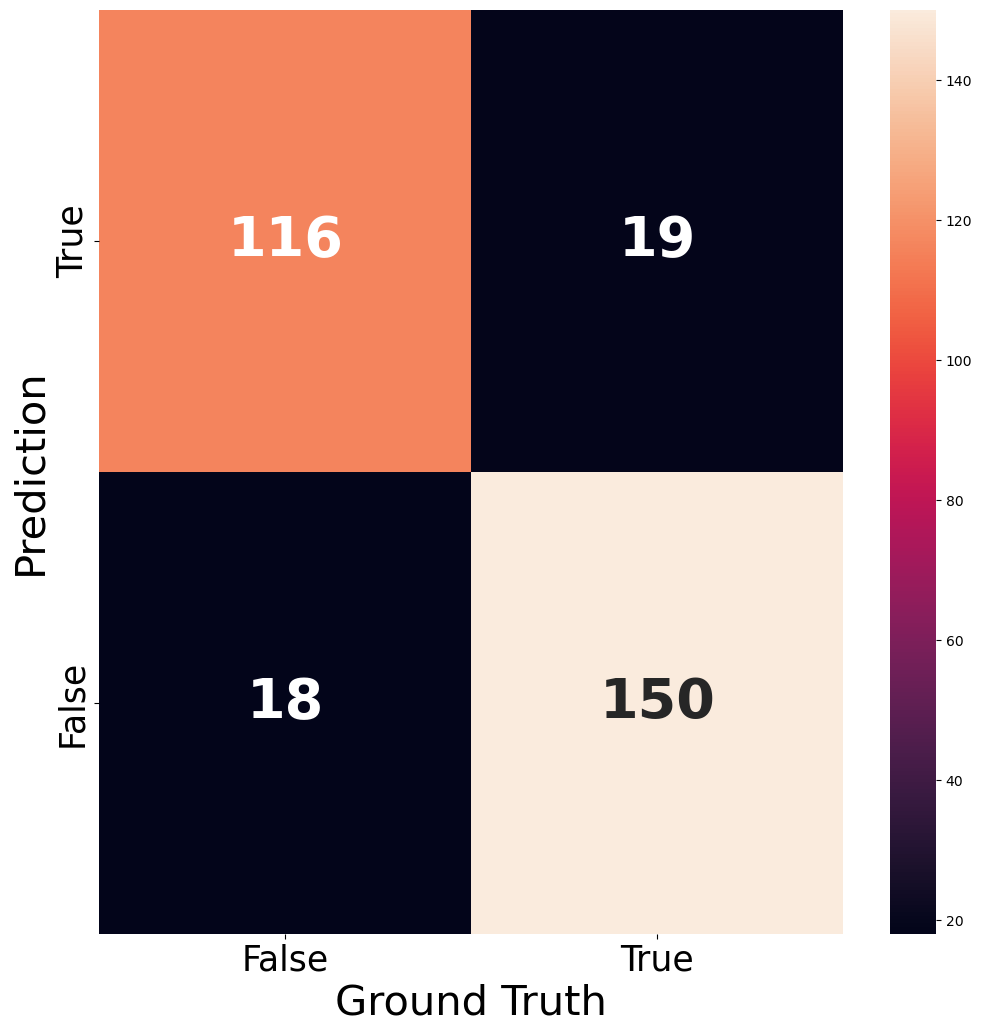

In [39]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

## 3.2. Finding the right K value

In [40]:
max_k = 40
f1_scores = list()
error_rates = list()

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1 - round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

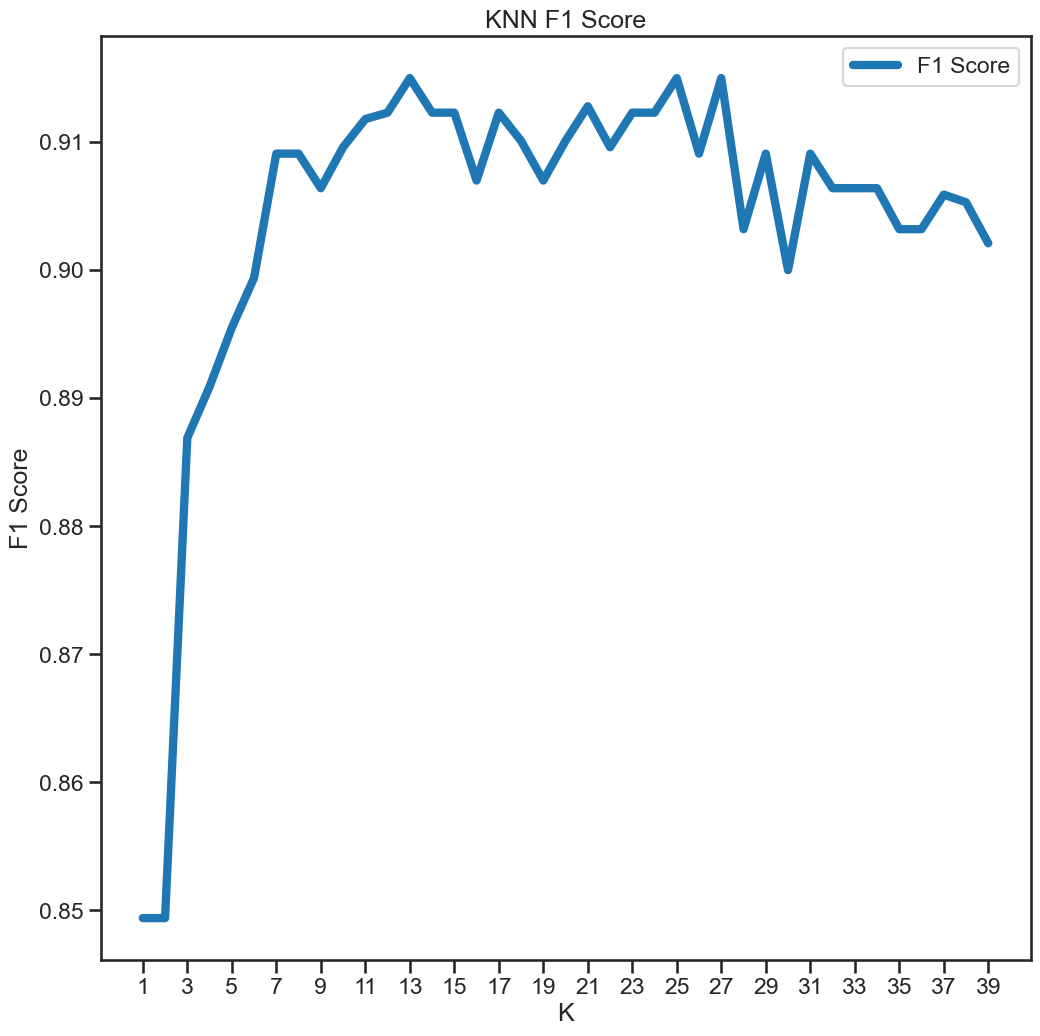

In [41]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

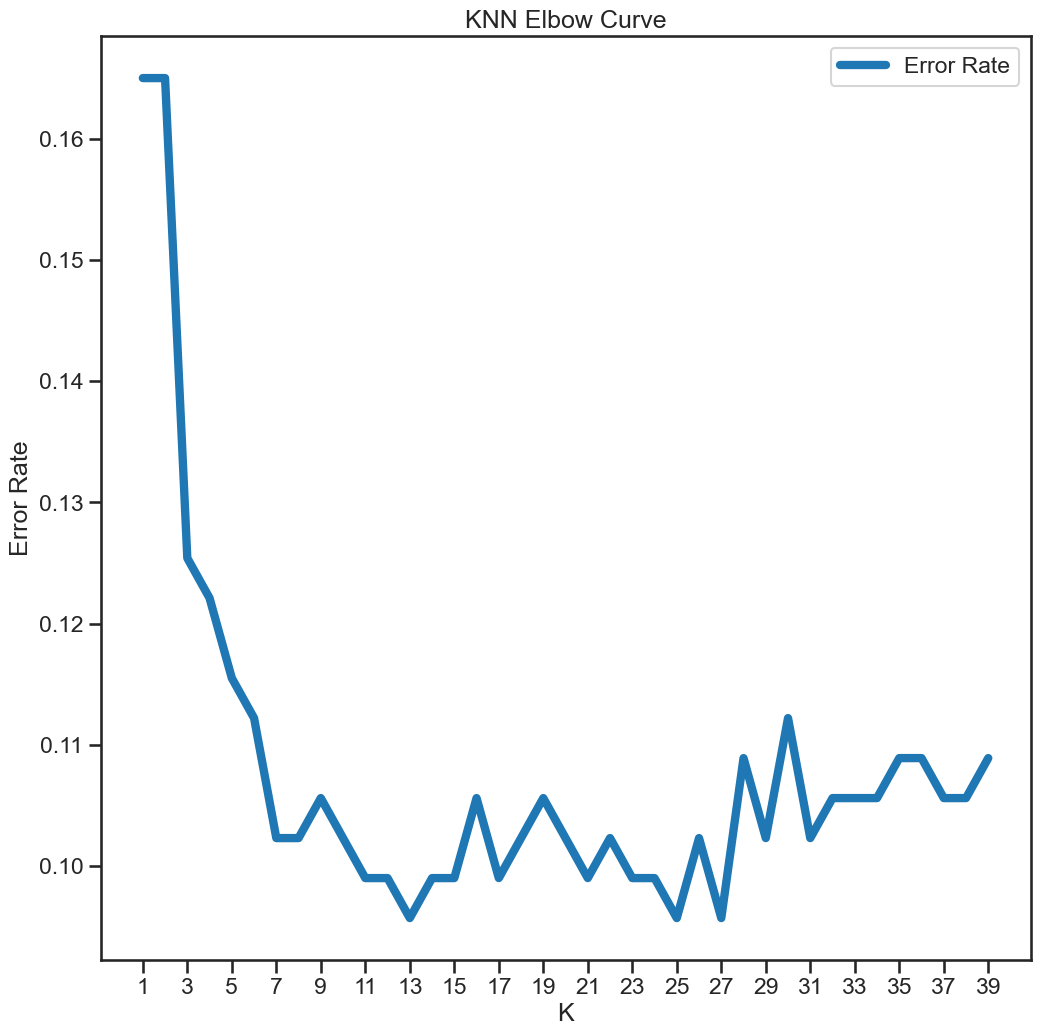

In [42]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

## IV. Support Vector Machine (SVM)

In [43]:
X_train.shape

(615, 15)

In [45]:
svm_model = svm.SVC()

In [46]:
svm_model.fit(X_train, y_train.values.ravel())

SVC()

In [47]:
svm_preds = svm_model.predict(X_test)

In [48]:
evaluate_metrics(y_test, svm_preds)

{'accuracy': 0.8877887788778878,
 'recall': array([0.84444444, 0.92261905]),
 'precision': array([0.8976378 , 0.88068182]),
 'f1score': array([0.87022901, 0.90116279])}

As we can see from the evaluation results above, the default SVM achieves relatively good performance on this binary classification class. The overall accuracy is 0.88 and f1_score is around 0.87.

## 4.1 Train SVM with different regularization parameters and kernels

In [50]:
params_grid = {
    'C': [1, 5, 10, 100],
    'kernel' : ['poly', 'rbf', 'sigmoid']
}

svc_search = GridSearchCV(estimator=svm.SVC(), param_grid=params_grid, cv=5)
svc_search.fit(X_train, y_train)
svc_preds = svc_search.predict(X_test)
evaluate_metrics(y_test, svc_preds)

{'accuracy': 0.8877887788778878,
 'recall': array([0.84444444, 0.92261905]),
 'precision': array([0.8976378 , 0.88068182]),
 'f1score': array([0.87022901, 0.90116279])}

In [51]:
svc_search.best_estimator_

SVC(C=1)

In [52]:
svc_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [53]:
svc_search.best_estimator_.fit(X_train, y_train)
svc_preds = svc_search.predict(X_test)
evaluate_metrics(y_test, svc_preds)

{'accuracy': 0.8877887788778878,
 'recall': array([0.84444444, 0.92261905]),
 'precision': array([0.8976378 , 0.88068182]),
 'f1score': array([0.87022901, 0.90116279])}

Not that much better than KNN.

## V. Decision Tree

In [54]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
dt.tree_.node_count, dt.tree_.max_depth

(219, 13)

In [56]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [57]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.795380
precision,1.0,0.858108
recall,1.0,0.755952
f1,1.0,0.803797


As we can see, the model performs so great (actually perfect) on the train dataset but relatively bad (extremely bad) on the test dataset. This indicates overfitting!

## 5.1. Decision Tree with GridSearchCV

In [58]:
params_grid = {
    "max_depth" : range(1, dt.tree_.max_depth+1, 2),
    "max_features" : range(1, len(dt.feature_importances_)+1)
}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 param_grid=params_grid,
                 scoring="accuracy",
                 n_jobs=-1)
GR = GR.fit(X_train, y_train)

In [59]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(55, 5)

In [60]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [61]:
train_test_gr_error

,train,test
accuracy,0.889431,0.815182
precision,0.888571,0.814607
recall,0.914706,0.863095
f1,0.901449,0.838150


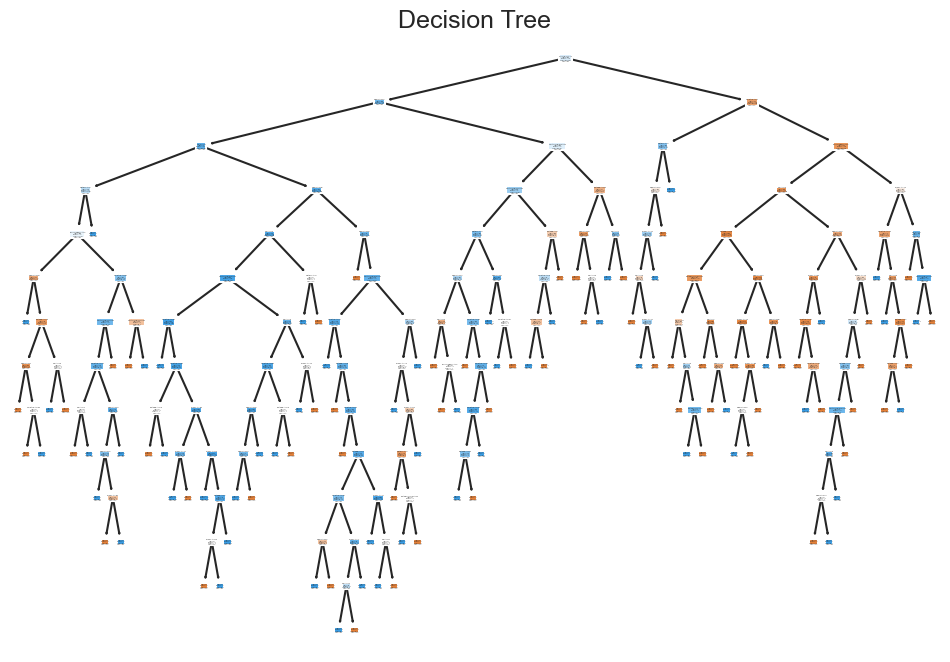

In [64]:
# Assuming 'data' is your DataFrame and you have already defined the feature columns
feature_cols = [x for x in X_raw.columns]  # Adjust this based on your dataset

# For the original decision tree (assuming `dt` is your trained model)
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=feature_cols, class_names=['Yes', 'No'])  # Adjust class names as needed
plt.title('Decision Tree')
plt.savefig('wine_tree.png')  # Save the tree as an image
plt.show()

Ugh, this model performs worse than SVM and Logistic Classifier. Let's move to the next one.

## VI. Random Forest

In [65]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [66]:
n_estimators=20
Bag= BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=n_estimators,random_state=0,bootstrap=True)

In [67]:
Bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=4,
                                                   random_state=2),
                  n_estimators=20, random_state=0)

In [68]:
Bag.predict(X_test).shape

(303,)

In [69]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.8646864686468647, 'trian Accuracy': 0.8780487804878049}


In [70]:
model = RandomForestClassifier( max_features=20,n_estimators=n_estimators, random_state=0)

In [71]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=20, n_estimators=20, random_state=0)

In [72]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.8877887788778878, 'trian Accuracy': 1.0}


In [73]:
RF = RandomForestClassifier(
    oob_score=True,
    random_state=42,
    warm_start=True,
    n_jobs=-1
)

oob_list = list()
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.188618
20.0,0.182114
30.0,0.169106
40.0,0.151220
50.0,0.151220
100.0,0.151220
150.0,0.154472
200.0,0.154472
300.0,0.152846


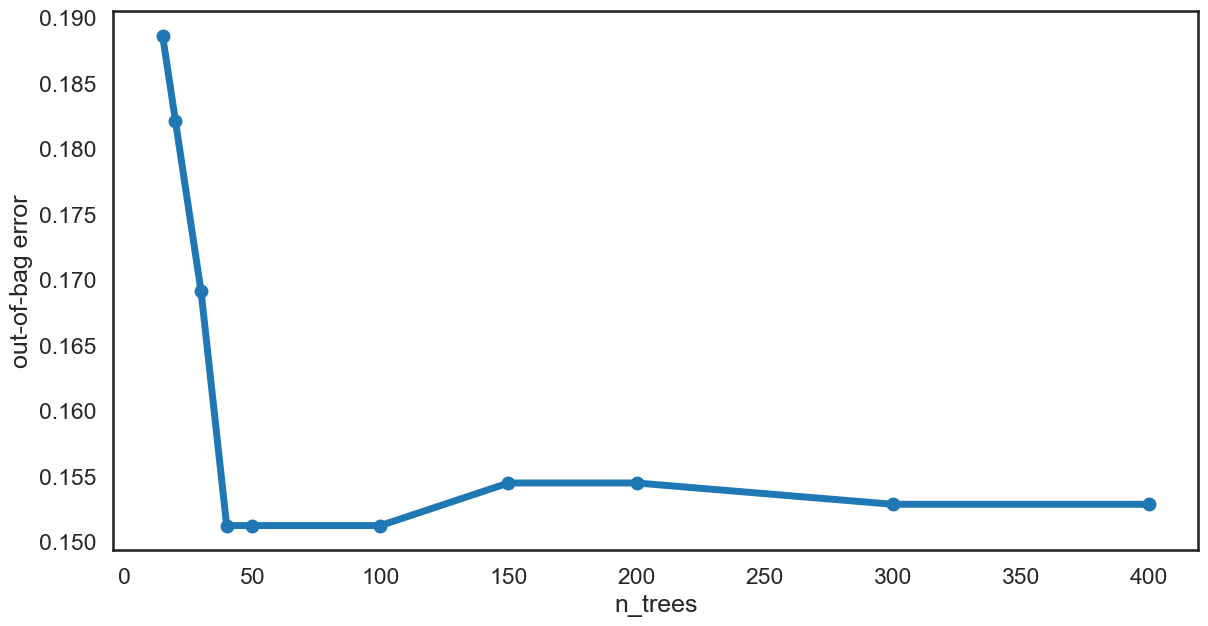

In [74]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.169106
20.0,0.169106
30.0,0.169106
40.0,0.167480
50.0,0.156098
100.0,0.152846
150.0,0.152846
200.0,0.147967
300.0,0.144715


In [76]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.188618,0.169106
20.0,0.182114,0.169106
30.0,0.169106,0.169106
40.0,0.151220,0.167480
50.0,0.151220,0.156098
100.0,0.151220,0.152846
150.0,0.154472,0.152846
200.0,0.154472,0.147967
300.0,0.152846,0.144715


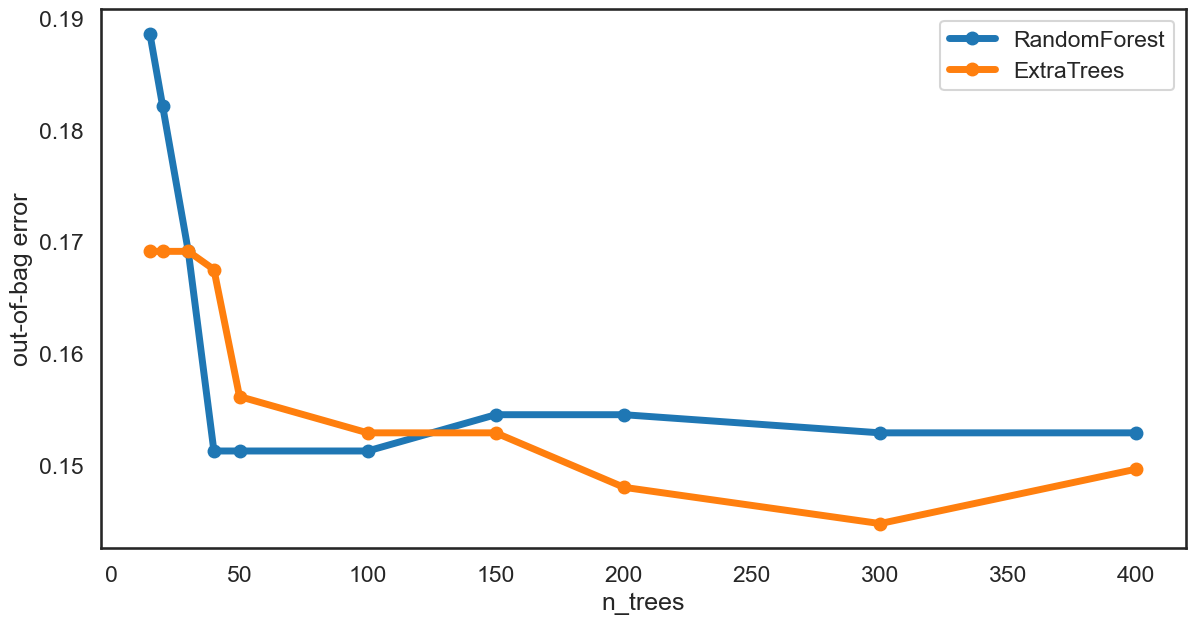

In [77]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [78]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=400)

y_pred = model.predict(X_test)

In [79]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       135
           1       0.89      0.91      0.90       168

    accuracy                           0.89       303
   macro avg       0.89      0.89      0.89       303
weighted avg       0.89      0.89      0.89       303

   accuracy  precision    recall        f1      auc
0  0.891089   0.894737  0.910714  0.902655  0.88869


## 6.1 GradientBoosting

In [80]:
model = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=5,
    random_state=42
)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [81]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [82]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.8712871287128713, 'trian Accuracy': 0.8991869918699187}


In [83]:
learning_rate=0.3
model =XGBClassifier(objective='binary:logistic',learning_rate=learning_rate,n_estimators=n_estimators)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.8646864686468647, 'trian Accuracy': 0.9853658536585366}


In [84]:
params_grid = {
    'learning_rate' : [0.1*(n+1) for n in range(5)],
    'n_estimators' : [2*n+1 for n in range(5)]
}

In [85]:
search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid,scoring="neg_log_loss")
search.fit(X_train, y_train)

[15:45:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1700181009589/work/src/learner.cc:767: 
Parameters: { "n_neighbors" } are not used.

[15:45:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1700181009589/work/src/learner.cc:767: 
Parameters: { "n_neighbors" } are not used.

[15:45:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1700181009589/work/src/learner.cc:767: 
Parameters: { "n_neighbors" } are not used.

[15:45:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1700181009589/work/src/learner.cc:767: 
Parameters: { "n_neighbors" } are not used.

[15:45:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1700181009589/work/src/learner.cc:767: 
Parameters: { "n_neighbors" } are not used.

[15:45:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1700181009589/work/src/learner.cc:767: 
Parameters: { "n_neighbors" } are not used.

[15:45:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1700181

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6]},
             scoring='neg_log_loss')

In [86]:
search.best_score_

-0.5106047845141941

In [87]:
search.best_params_

{'n_neighbors': 2}

In [88]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.8943894389438944, 'trian Accuracy': 1.0}


# Report


### For this task of predicting health attack risk, simple white-box models such as Logistic Regression and KNN are enough. Models such as DecisionTree, XGBoost works too good to the point of overfitting and does not give much of a better performance than the aforementioned models of Logistic Regression and KNN.

<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
